In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
!pip install nltk


In [3]:
# Get the English stopwords from the NLTK stopwords dataset
# These are words that are often excluded from text analysis as they typically don't carry much meaning
# and are commonly used (e.g., 'the', 'and', 'is')
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords', download_dir='/usr/share/nltk_data')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stop_words = set(stopwords.words('english'))

In [10]:
df = pd.read_csv('vaccination_tweets.csv')

In [11]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [13]:
df.isnull().sum() #Count the number of missing values in each column of the DataFrame 'df'

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [14]:
df.columns #returns the columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [15]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1) #Axis 1 indicats column

#Now we have a dataframe only consisting of the text and index(dropped all unnecessary options)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [16]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [17]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [18]:
#re.sub() function allows you to replace occurrences of a pattern in a string with a specified replacement.
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text) #Joins the filtered words back into a single string, separating them with spaces, and returns the processed text.

In [19]:
nltk.download('punkt')
# Applying the data_processing function to each element in the 'text' column of the DataFrame
text_df['text'] = text_df['text'].apply(data_processing) #.apply() is a function provided by Pandas for DataFrames

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
text_df = text_df.drop_duplicates('text')
#remove duplicate rows from the DataFrame based on 'text'. It returns a new DataFrame with duplicate rows removed.

In [21]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [22]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))
# lamda is used to apply the stemming function to each element in the 'text' column.

In [ ]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [23]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [ ]:
#As text_df is already a  DataFrame & datatframe has a default integer index, use direct indexing without specifying loc or iloc:
print(text_df['text'][0], "\n")
print(text_df['text'][1], "\n")
print(text_df['text'][2], "\n")
print(text_df['text'][3], "\n")
print(text_df['text'][4], "\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 422.8+ KB


In [24]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

#polarity function calculates and returns the sentiment polarity of the input text using the TextBlob library
#Sentiment polarity is usually calculated using machine learning techniques or pre-trained models. The TextBlob library, which your polarity function utilizes, is one such tool that provides a pre-trained model for sentiment analysis.
#Example:
#For instance, a positive sentence like "I love this product" might have a high positive polarity score (close to 1),
#while a negative sentence like "I hate waiting" might have a high negative polarity score (close to -1).

In [25]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [ ]:
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [26]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [27]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [28]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

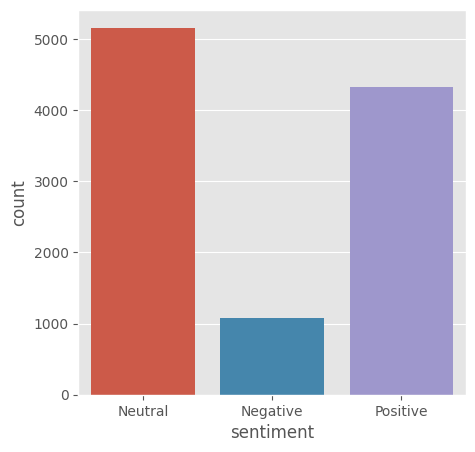

In [29]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

In [31]:
tags = text_df['sentiment'].value_counts() #.value_counts() is indeed an in-built function in pandas
print(tags)

Neutral     5151
Positive    4317
Negative    1075
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Distribution of sentiments')

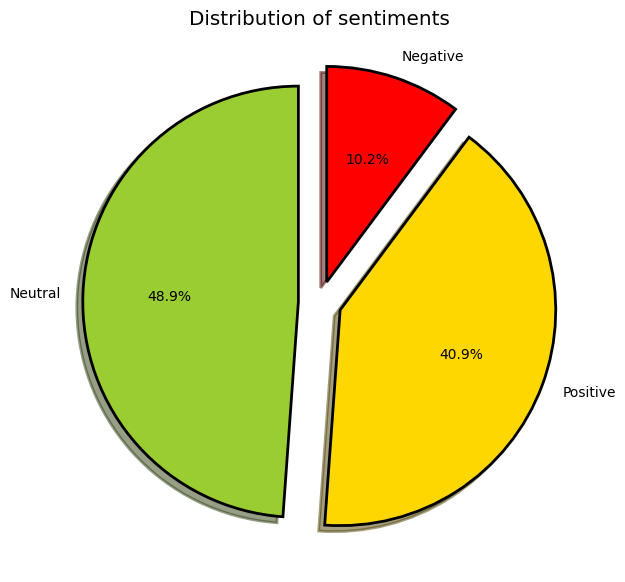

In [30]:

# Create a figure with a specified size
fig = plt.figure(figsize=(7, 7))
# Define colors for the pie chart
colors = ("yellowgreen", "gold", "red")
# Define properties for wedge (slices) in the pie chart
wp = {'linewidth': 2, 'edgecolor': "black"}
# Count the occurrences of each sentiment category in the 'sentiment' column of the 'text_df' DataFrame
tags = text_df['sentiment'].value_counts()

# Define the degree to which each slice of the pie should be exploded (pulled out)
explode = (0.1, 0.1, 0.1)

# Plot a pie chart using the data from 'tags'
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')

# Set the title of the pie chart
plt.title('Distribution of sentiments')

# Display the pie chart
plt.show()


In [32]:
pos_tweets = text_df[text_df.sentiment == 'Positive'] # Filter rows in 'text_df' where sentiment is 'Positive'
pos_tweets = pos_tweets.sort_values(['polarity'], ascending=False) # Sort the filtered DataFrame based on the 'polarity' column in descending order
pos_tweets.head() # Display the first few rows of the sorted DataFrame


,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,Positive
5041,get art printed awesome products support redbu...,1.0,Positive
1055,already vaccinated getting vaccine soon plan t...,1.0,Positive


In [35]:
pos_tweets["text"]

9317     best way get merrygoround pfizer pfizerbiontec...
2340     applying emotion pfizerbiontech based best evi...
6295     pfizer jab morning efficient wellorganised tha...
5041     get art printed awesome products support redbu...
1055     already vaccinated getting vaccine soon plan t...
                               ...                        
10657    got pfizer booster yesterday sore arm slight f...
7913     major side effects report second dose pfizerbi...
9599     many men refuse take covid19 vaccine regularly...
9329     deltavariant far hard time reopened thanks con...
7013     whole world experimental testing ground indust...
Name: text, Length: 4317, dtype: object

 nltk.tokenize.word_tokenize function is used to tokenize each sentence into individual words before joining them into the text variable. This ensures that the word cloud is based on individual words rather than entire sentences.

 A word cloud is a data visualization technique that represents textual data in a graphical form, where the size of each word indicates its frequency or importance in the given text. The more frequently a word appears in the text, the larger and bolder it appears in the word cloud. It is a visualization technique that involves simple statistical and graphical methods to represent the frequency of words in a given text.

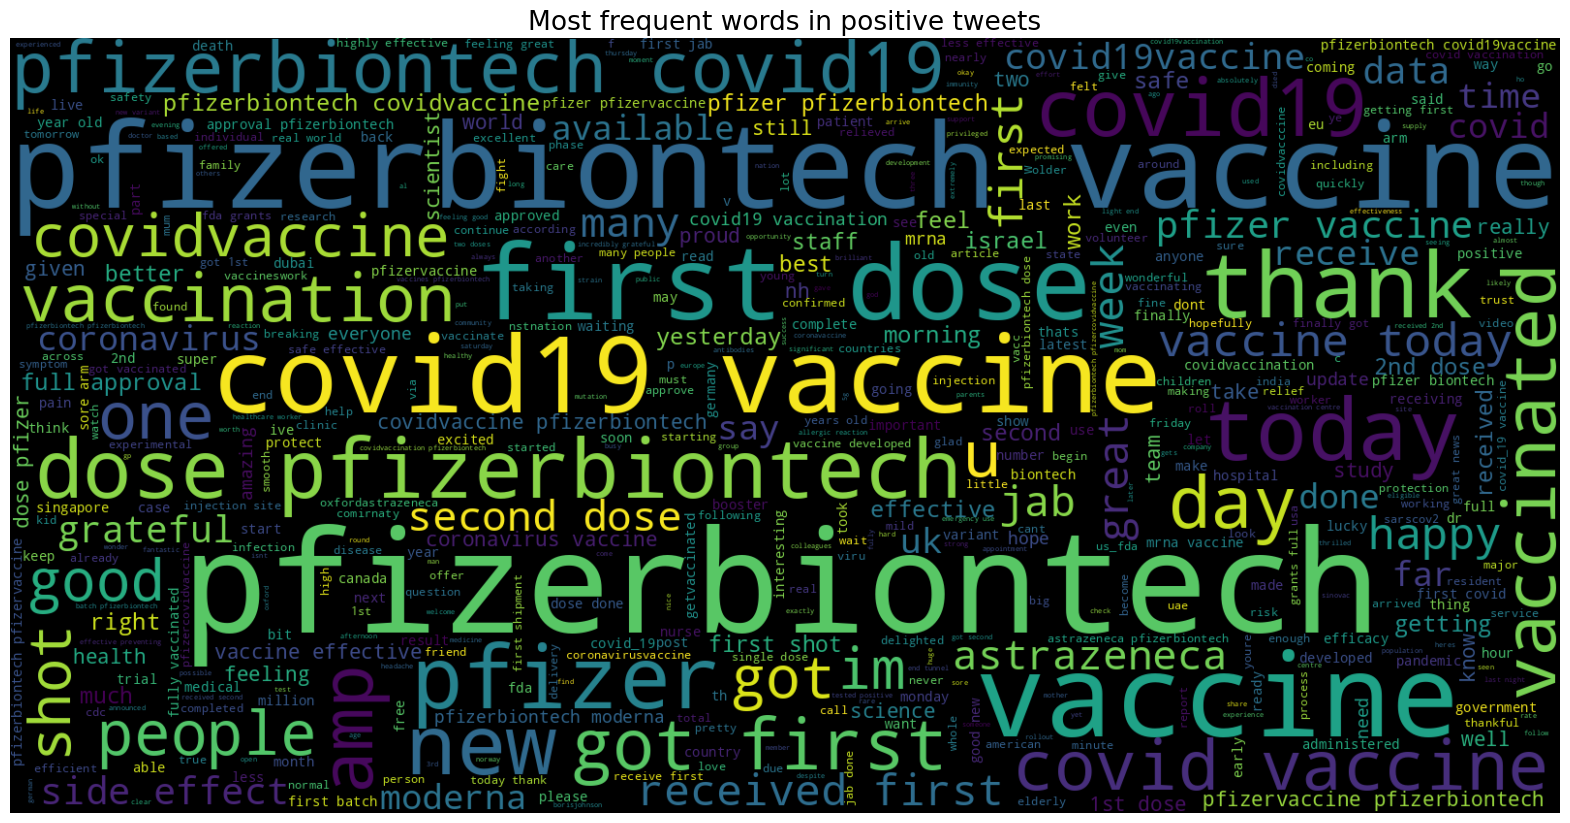

In [36]:
# Import necessary libraries
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

# Concatenate all words in the 'text' column of positive tweets
text = ' '.join([word
                 for sentence in pos_tweets['text']  # Loop over each sentence in the 'text' column
                 for word in word_tokenize(sentence)])  # Tokenize each sentence into words and loop over the words

# Create a figure with specified size
plt.figure(figsize=(20, 15), facecolor='None')

# Generate a WordCloud using the concatenated text
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display the WordCloud with interpolation set to 'bilinear'
plt.imshow(wordcloud, interpolation='bilinear') #interpolation='bilinear' setting is often used to make the display look smoother and more visually appealing.

# Turn off axis for better visualization
plt.axis("off")

# Set the title of the plot
plt.title('Most frequent words in positive tweets', fontsize=19)

# Show the plot
plt.show()

Here's a brief explanation of some common interpolation methods:

Nearest-neighbor ('nearest'): Uses the value of the nearest pixel to the non-integer coordinates.

Bilinear ('bilinear'): Calculates the weighted average of the nearest four pixels based on their distances.

Bicubic ('bicubic'): A higher-order interpolation method that uses a cubic polynomial.

Choosing the interpolation method depends on the specific visualization requirements and the desired visual appearance. Bilinear interpolation is a good choice for smoothing out the display of images, including word clouds.

In [40]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


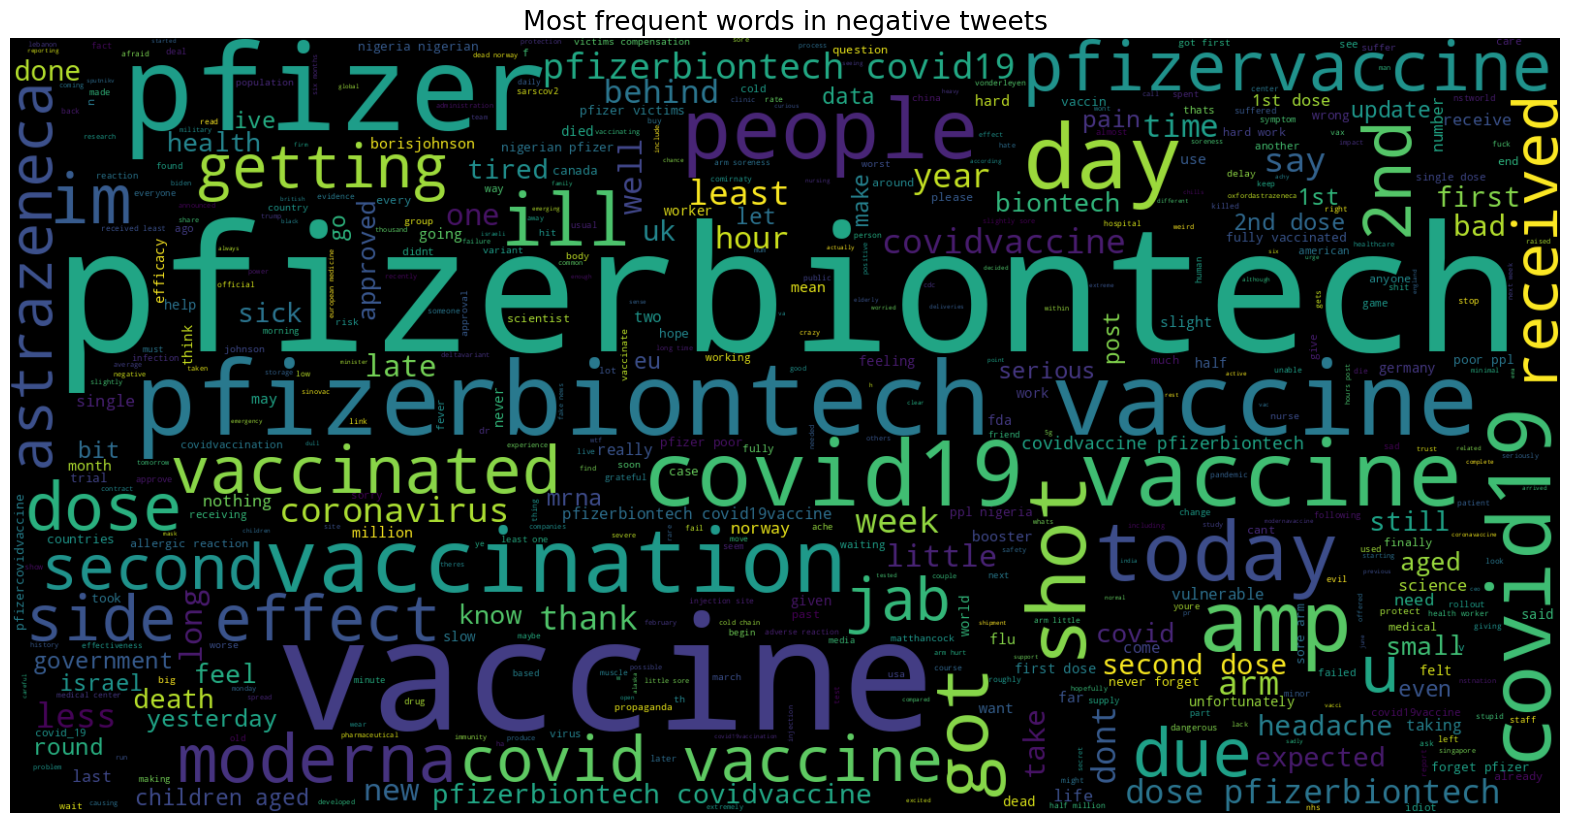

In [43]:
# Concatenate all words in the 'text' column of negative tweets
text = ' '.join([word
                 for sentence in neg_tweets['text']  # Loop over each sentence in the 'text' column
                 for word in word_tokenize(sentence)])  # Tokenize each sentence into words and loop over the words
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [42]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


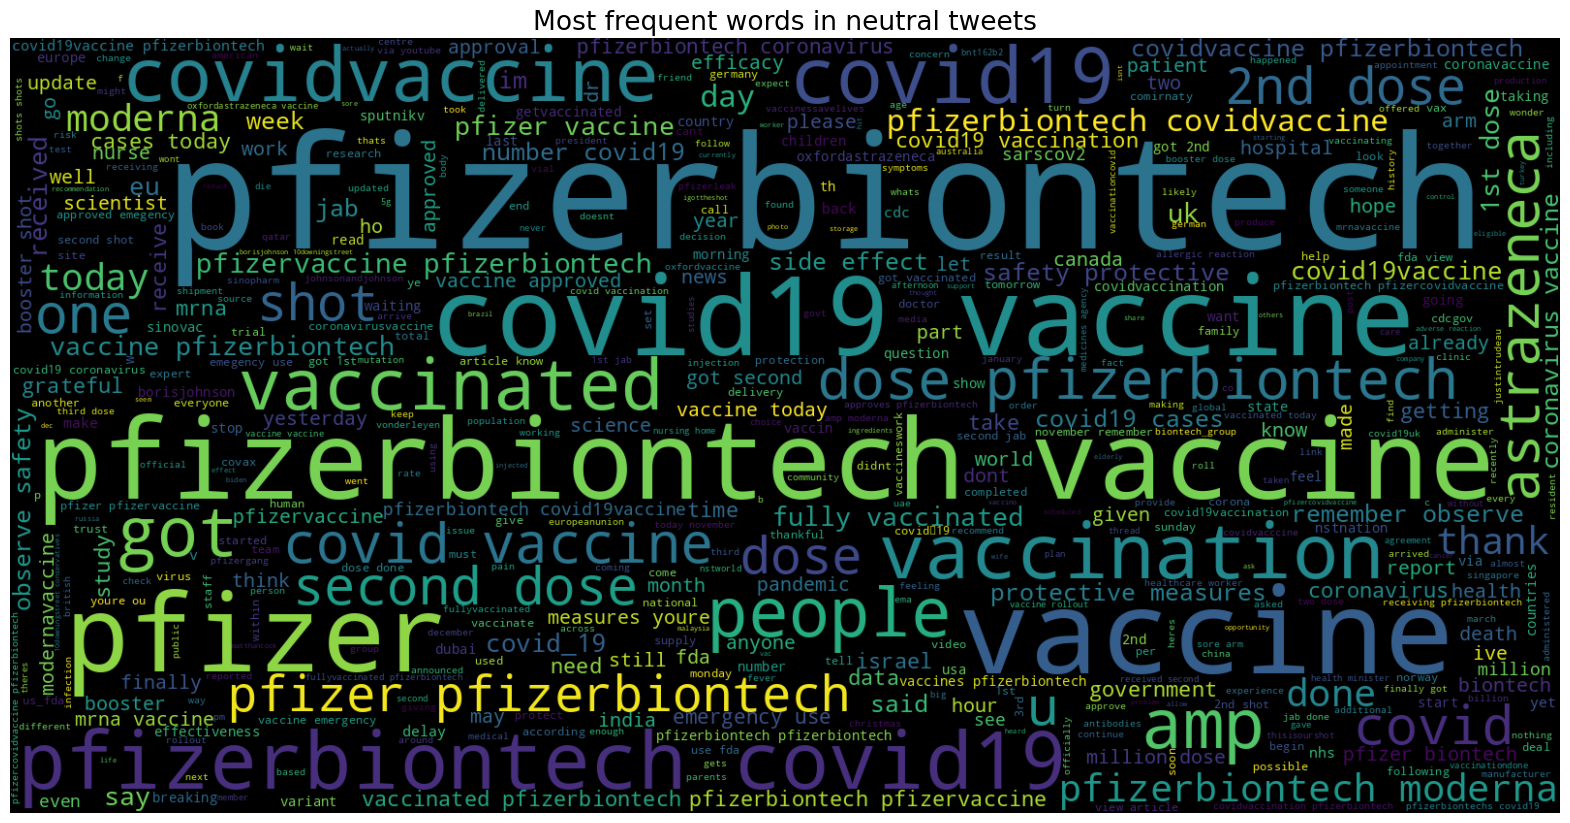

In [47]:
# Concatenate all words in the 'text' column of neutral tweets
text = ' '.join([word
                 for sentence in neutral_tweets['text']  # Loop over each sentence in the 'text' column
                 for word in word_tokenize(sentence)])  # Tokenize each sentence into words and loop over the words
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [46]:
# Create a CountVectorizer object with ngram_range=(1,2)
# This means we are considering unigrams (single words) and bigrams (two consecutive words) as features
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

#vect = CountVectorizer(ngram_range=(1,2), max_features=1000).fit(text_df['text'])
#max_features=1000 means that only the top 1000 features (words or word pairs) with the highest term frequencies
#across the entire corpus will be kept.
#If max_features is not specified, it considers all features in the vocabulary.

In [49]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 78583

First 20 features:
 ['000' '000 doses' '000 initial' '000 people' '000 vaccines' '0000001'
 '0000001 covid19' '0011' '0011 abt' '004' '004 covid' '004 israelis' '01'
 '01 getting' '01 june' '01 november' '01aug2021' '01aug2021 doublevaxxed'
 '02' '02 175']


In [50]:
X = text_df['text'] # Extract the 'text' column from the DataFrame as the feature variable X
Y = text_df['sentiment'] # Extract the 'sentiment' column from the DataFrame as the target variable Y

# Use the fitted CountVectorizer to transform the 'text' data into a bag-of-words representation
# The transform method converts the text data into a sparse matrix where each row represents a document
# and each column represents a unique word or word pair learned during the fitting process
X = vect.transform(X)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8434, 78583)
Size of y_train: (8434,)
Size of x_test: (2109, 78583)
Size of y_test: (2109,)


In [53]:
#Using logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.64%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  72  116   38]
 [   4 1008    9]
 [   8  149  705]]


              precision    recall  f1-score   support

    Negative       0.86      0.32      0.46       226
     Neutral       0.79      0.99      0.88      1021
    Positive       0.94      0.82      0.87       862

    accuracy                           0.85      2109
   macro avg       0.86      0.71      0.74      2109
weighted avg       0.86      0.85      0.83      2109



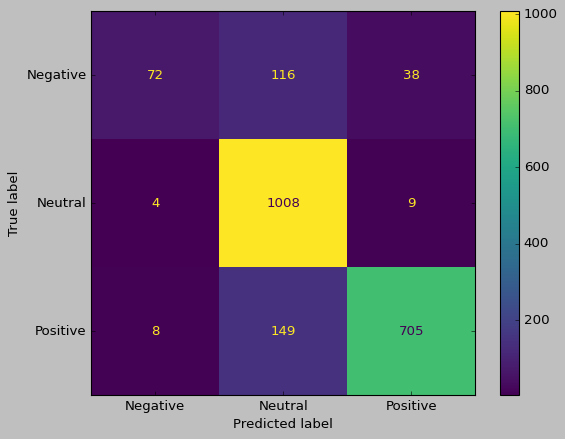

In [55]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
# Create a ConfusionMatrixDisplay object with the confusion matrix and class labels
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [56]:
from sklearn.model_selection import GridSearchCV

GridSearchCV is a method provided by scikit-learn for performing an exhaustive search over a specified parameter grid to find the best set of hyperparameters for a machine learning model. It is used for hyperparameter tuning.

In [57]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
#Define a dictionary specifying the hyperparameter grid to search over. In this case,
#it's the regularization parameter C for logistic regression, and the grid includes values [0.001, 0.01, 0.1, 1, 10].
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)
#Fit the grid search to the training data (x_train, y_train).
#This step performs an exhaustive search over the specified hyperparameter grid, training and evaluating the logistic
#regression model with different values of C using cross-validation.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [58]:
print("Best parameters:", grid.best_params_) #output the best hyperparameters found by the grid search
#It will display the best value of C that maximizes the specified scoring metric. T

Best parameters: {'C': 10}


In this case, it will try logistic regression models with C values of 0.001, 0.01, 0.1, 1, and 10, and it will select the one that performs the best.
These best hyperparameters are then used to train the final model.

In [59]:
y_pred = grid.predict(x_test)

In [60]:
logreg_acc = accuracy_score(y_pred, y_test)  #accuracy improves slightly using hyperparameter tuning than without hyperparameter tuning
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.92%


In [61]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  84  104   38]
 [   4 1008    9]
 [  10  132  720]]


              precision    recall  f1-score   support

    Negative       0.86      0.37      0.52       226
     Neutral       0.81      0.99      0.89      1021
    Positive       0.94      0.84      0.88       862

    accuracy                           0.86      2109
   macro avg       0.87      0.73      0.76      2109
weighted avg       0.87      0.86      0.85      2109



In [62]:
from sklearn.svm import LinearSVC #trying support vector classifier

In [63]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [64]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 87.34%


In [65]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 101   91   34]
 [   6 1007    8]
 [  14  114  734]]


              precision    recall  f1-score   support

    Negative       0.83      0.45      0.58       226
     Neutral       0.83      0.99      0.90      1021
    Positive       0.95      0.85      0.90       862

    accuracy                           0.87      2109
   macro avg       0.87      0.76      0.79      2109
weighted avg       0.88      0.87      0.87      2109



In [66]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [67]:
y_pred = grid.predict(x_test)

In [69]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.58%


In [70]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.58%


We see that support vector classifier performs slightly better than logistic regresion giving a better accuracy